In [114]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
filename = '/content/drive/My Drive/dados_colab/Redes Neurais/PP2/dataAll.txt'
dt = np.dtype([('x1', float),('x2', float),('yd', float)])
data = np.fromfile(filename, dtype=dt)

In [158]:
n = 0.1 #Taxa de aprendizado
teta = 0 #Degrau usado na função de ativação
w = np.random.uniform(-0.5, 0.5, 3) #Vetor de pesos inicial
print("Vetor inicial de pesos: ", w)

def funcao(u): #Função de ativação
  if(u >= teta):
    return 1
  else:
    return 0

#Verificar se há necessidade de aprendizagem
i = 0
while i < 2:
  linha = data[i]
  yd = linha[2]
  x = np.array([-1, linha[0], linha[1]])

  u = 0
  for j in range(3):
    u += (x[j] * w[j])

  y = funcao(u)

  if (yd == y):
    print('Não há necessidade de aprendizagem')
  else:
    print('Há necessidade de aprendizagem')

  i += 1




Vetor inicial de pesos:  [0.29233526 0.35878812 0.15036163]
Não há necessidade de aprendizagem
Não há necessidade de aprendizagem


In [87]:
zero = np.empty((0,3), float)
for x in range(len(data)):
  if (data[x][2] == 0):
    temp = np.array([[data[x][0],data[x][1],data[x][2]]])
    zero = np.append(zero, temp, axis=0)

um = np.empty((0,3), float)
for x in range(len(data)):
  if (data[x][2] == 1):
    temp = np.array([[data[x][0],data[x][1],data[x][2]]])
    um = np.append(um, temp, axis=0)

Separando os exemplos segundos os valores de yd correspondentes as classes binárias.
* O ndarray zero corresponde a classe 0.
* O ndarray um corresponde a classe 1.

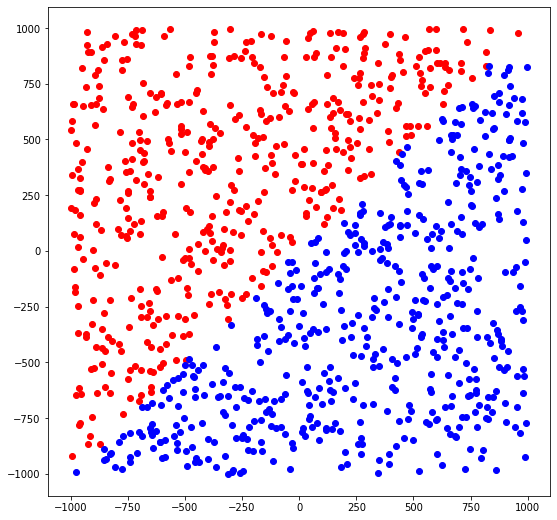

In [112]:
plt.figure(figsize=(9, 9))
plt.scatter(zero[0:,0],zero[0:,1], c='red')
plt.scatter(um[0:,0],um[0:,1], c='blue') 
plt.show()

#Gráfico
* A cor vermelha é correspondente a classe 0 dos valores de yd.
* A cor azul é correspondente a classe 1 dos valores de yd.